SVC.pkl

In [1]:
#Importing Necesary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
cols= ['SL','SW','PL','PW','Species']

In [3]:
#Read the Dataset
df= pd.read_csv('iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


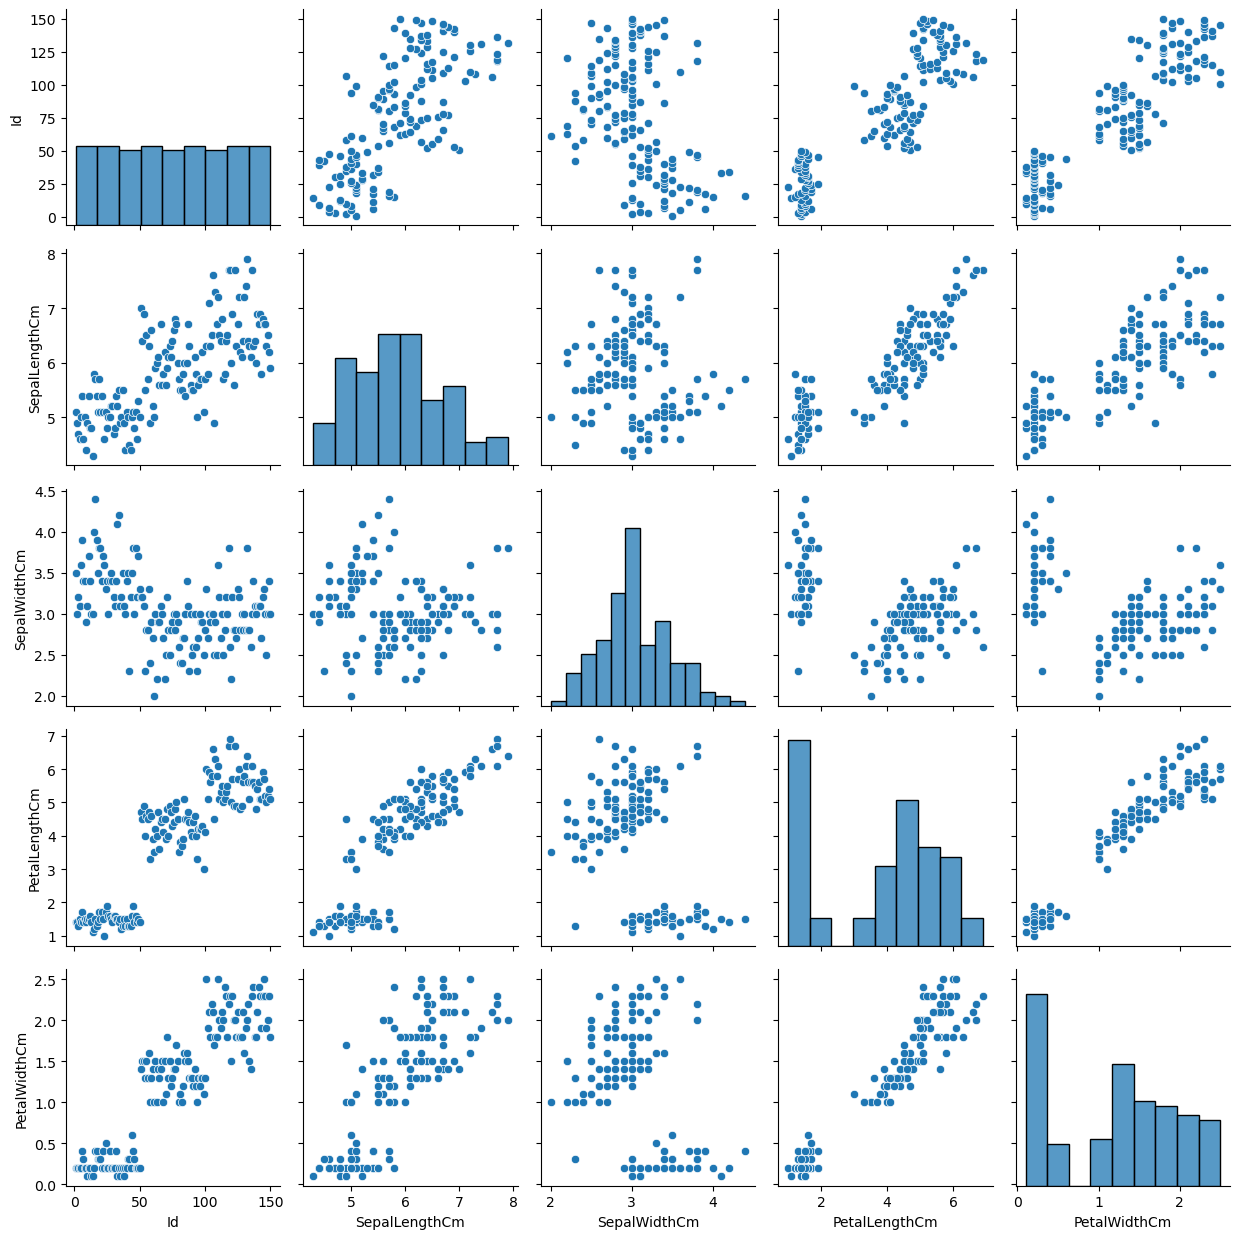

In [4]:
sns.pairplot(df)
plt.tight_layout()

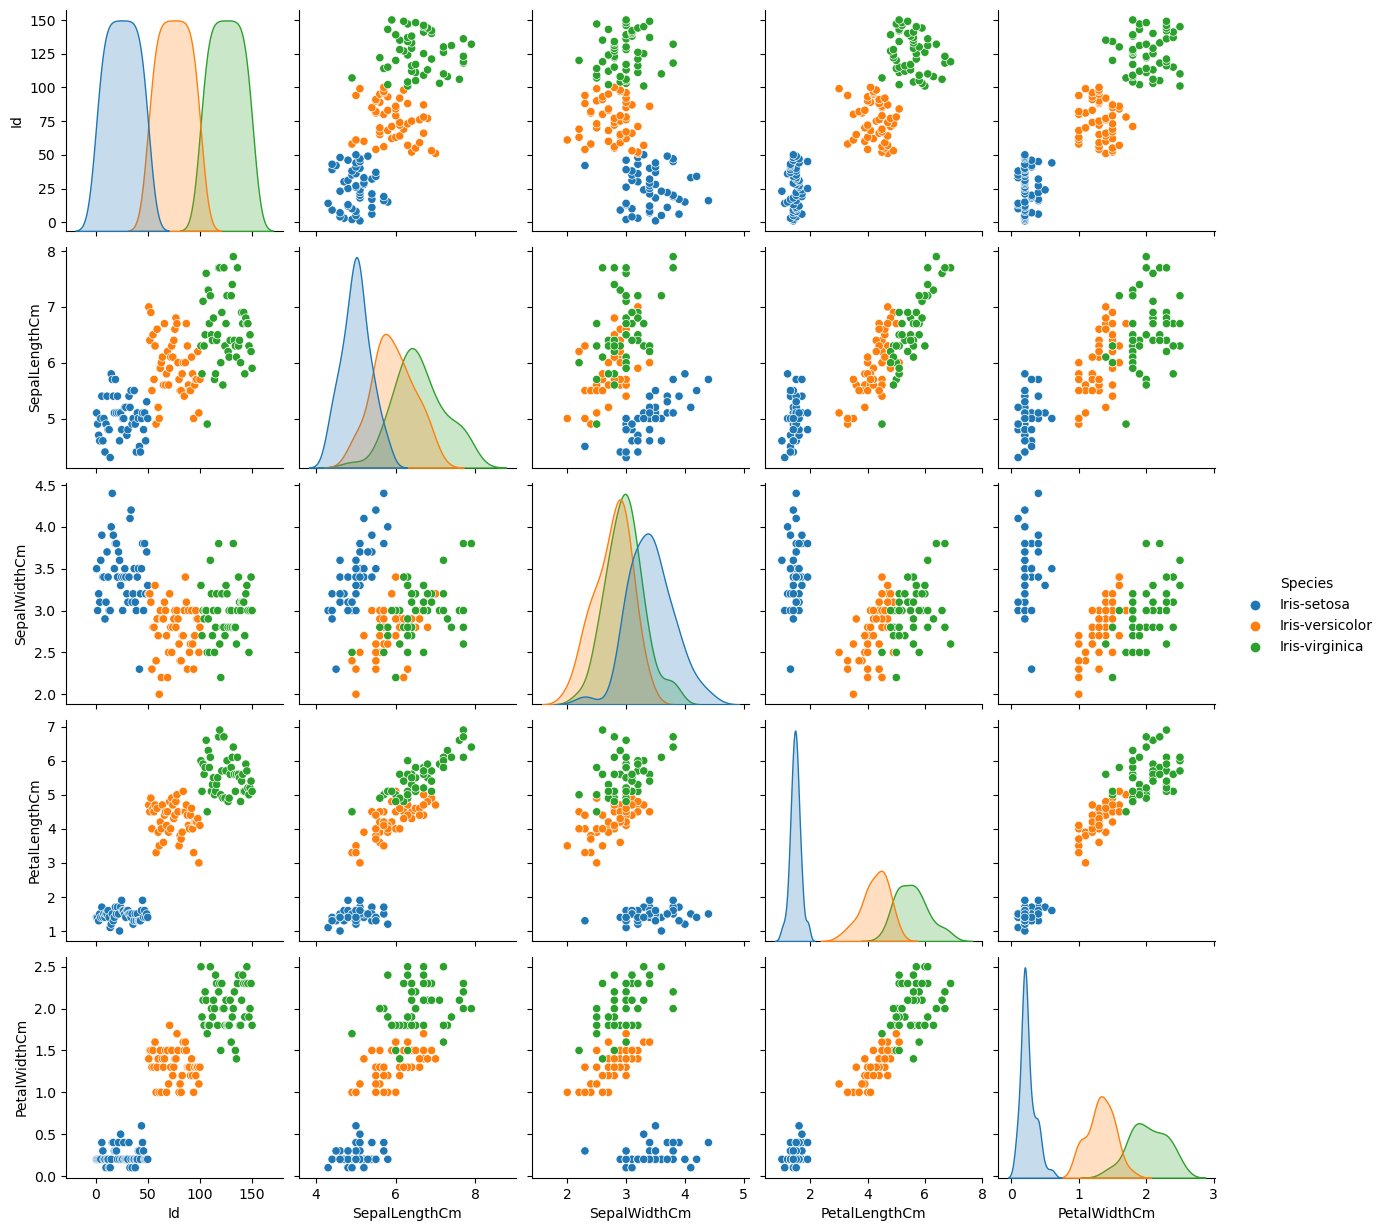

In [5]:
sns.pairplot(df, hue='Species')

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le= LabelEncoder()
y= le.fit_transform(df['Species'])

In [8]:
x= df.iloc[:,:-1]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=1)

In [11]:
svm= SVC()
svm.fit(xtrain, ytrain)
ypred= svm.predict(xtest)

In [12]:
ypred

array([0, 2, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 2, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0])

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.88      0.93        16
           2       0.82      1.00      0.90         9

    accuracy                           0.95        38
   macro avg       0.94      0.96      0.94        38
weighted avg       0.96      0.95      0.95        38



In [15]:
svm.score(xtrain, ytrain), svm.score(xtest, ytest)

(0.9821428571428571, 0.9473684210526315)

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
svc = SVC()

In [18]:
params= {
    'C':[0.01, 0.001, 1, 10, 18],
    'kernel':['linear','rbf','poly'],
    'gamma':[0.1, 1, 2, 3, 4, 5]
}

In [19]:
grid= GridSearchCV(SVC(), param_grid=params)

In [20]:
grid.fit(xtrain, ytrain)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.001, 1, 10, 18],
                         'gamma': [0.1, 1, 2, 3, 4, 5],
                         'kernel': ['linear', 'rbf', 'poly']})

In [21]:
grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}

In [22]:
grid.best_score_

1.0

In [23]:
model= SVC(C=1, gamma=0.1, kernel='linear')

In [24]:
model.fit(xtrain, ytrain)
ypred= model.predict(xtest)

In [25]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         9

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [26]:
model.score(xtrain, ytrain), model.score(xtest, ytest)

(1.0, 1.0)

In [27]:
import pickle

In [28]:
pickle.dump(model, open('svc.pkl', 'wb'))

In [29]:
import pickle

In [30]:
model= pickle.load(open('svc.pkl', 'rb'))

In [31]:
model.predict([[8.5, 5.1, 3.5, 1.4, 0.2]])

C:\Users\Janhavi\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])